In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from google.colab import drive


# Mount Google Drive
#drive.mount('/content/drive', force_remount=True)

#train_data = pd.read_csv("/content/drive/MyDrive/EE599/train.csv")
#test_data = pd.read_csv("/content/drive/MyDrive/EE599/test.csv")

# take the daa from the csv file
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

X_train = train_data.drop(columns=['Activity'])
y_train = train_data['Activity']
X_test = test_data.drop(columns=['Activity'])
y_test = test_data['Activity']



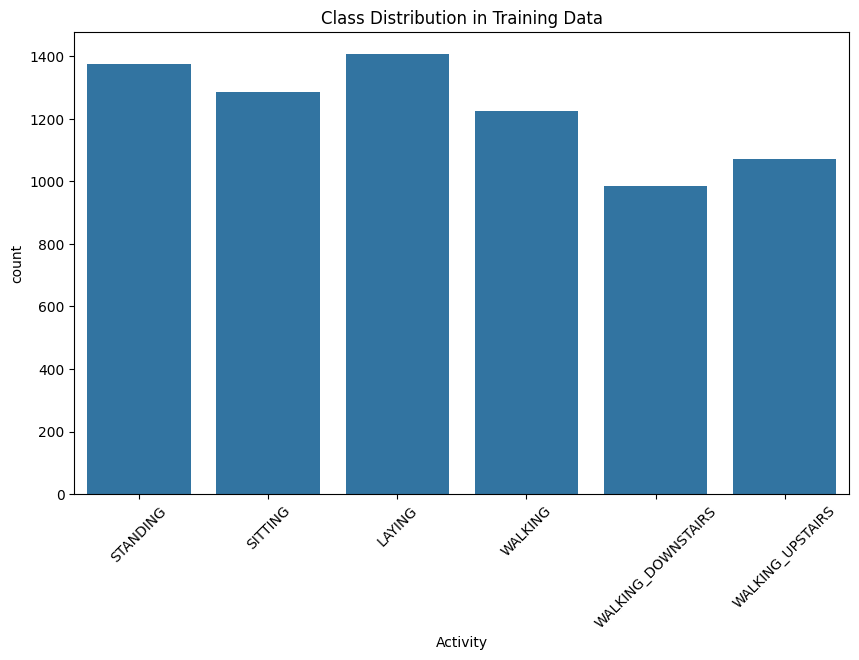

In [2]:
# Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)  # Directly plot y_train as Seaborn expects a single feature for countplot
plt.title("Class Distribution in Training Data")
plt.xlabel("Activity")
plt.xticks(rotation=45)
plt.show()

In [2]:
# Introduce label noise by shuffling labels for 10% of the remaining training data
# Separate features and target, keeping 'subject' as a feature
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (Activity) for model compatibility
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

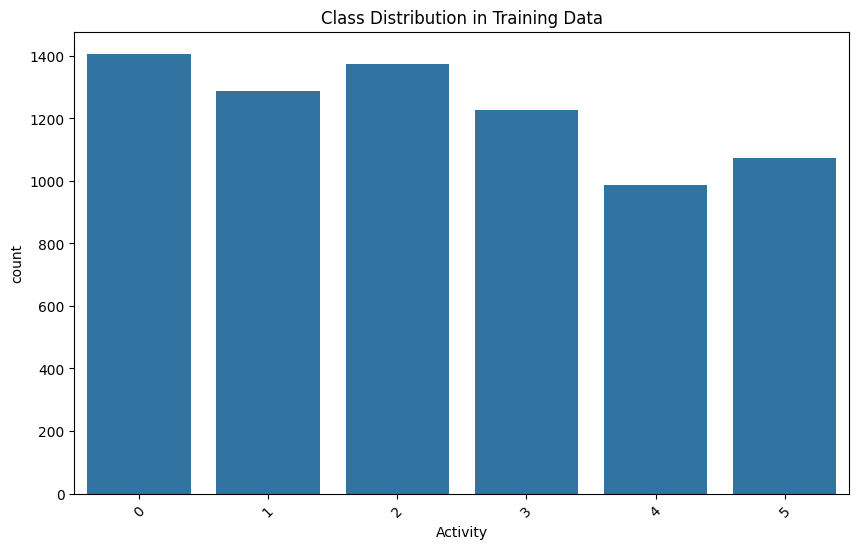

In [4]:
# Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)  # Directly plot y_train as Seaborn expects a single feature for countplot
plt.title("Class Distribution in Training Data")
plt.xlabel("Activity")
plt.xticks(rotation=45)
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Print number of features before feature engineering
print("Number of features before feature engineering:", X_train.shape[1])

# Feature Engineering
def feature_engineering(data):
    # Adding statistical features
    data['tBodyAcc_mean_mag'] = np.sqrt(data['tBodyAcc-mean()-X']**2 + data['tBodyAcc-mean()-Y']**2 + data['tBodyAcc-mean()-Z']**2)
    data['tBodyAcc_std_mag'] = np.sqrt(data['tBodyAcc-std()-X']**2 + data['tBodyAcc-std()-Y']**2 + data['tBodyAcc-std()-Z']**2)
    data['tBodyAcc_min'] = data[['tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z']].min(axis=1)
    data['tBodyAcc_max'] = data[['tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z']].max(axis=1)

    # Domain-specific features
    data['tGravityAcc_magnitude'] = np.sqrt(data['tGravityAcc-mean()-X']**2 + data['tGravityAcc-mean()-Y']**2 + data['tGravityAcc-mean()-Z']**2)
    data['tBodyAccJerk_magnitude'] = np.sqrt(data['tBodyAccJerk-mean()-X']**2 + data['tBodyAccJerk-mean()-Y']**2 + data['tBodyAccJerk-mean()-Z']**2)
    data['tBodyGyroJerk_magnitude'] = np.sqrt(data['tBodyGyroJerk-mean()-X']**2 + data['tBodyGyroJerk-mean()-Y']**2 + data['tBodyGyroJerk-mean()-Z']**2)

    # Feature interactions
    data['tBodyAcc_Gyro_mean_X_product'] = data['tBodyAcc-mean()-X'] * data['tBodyGyro-mean()-X']
    data['tBodyAcc_Gyro_mean_Y_product'] = data['tBodyAcc-mean()-Y'] * data['tBodyGyro-mean()-Y']
    data['tBodyAcc_Gyro_mean_Z_product'] = data['tBodyAcc-mean()-Z'] * data['tBodyGyro-mean()-Z']

    # Statistical moments
    data['tBodyAcc_mean_X_skew'] = data['tBodyAcc-mean()-X'].skew()
    data['tBodyAcc_mean_Y_skew'] = data['tBodyAcc-mean()-Y'].skew()
    data['tBodyAcc_mean_Z_skew'] = data['tBodyAcc-mean()-Z'].skew()
    data['tBodyAcc_mean_X_kurt'] = data['tBodyAcc-mean()-X'].kurt()
    data['tBodyAcc_mean_Y_kurt'] = data['tBodyAcc-mean()-Y'].kurt()
    data['tBodyAcc_mean_Z_kurt'] = data['tBodyAcc-mean()-Z'].kurt()

    # Signal ratios
    data['tBodyAcc_X_max_min_ratio'] = data['tBodyAcc-max()-X'] / (data['tBodyAcc-min()-X'] + 1e-5)
    data['tBodyAcc_Y_max_min_ratio'] = data['tBodyAcc-max()-Y'] / (data['tBodyAcc-min()-Y'] + 1e-5)
    data['tBodyAcc_Z_max_min_ratio'] = data['tBodyAcc-max()-Z'] / (data['tBodyAcc-min()-Z'] + 1e-5)

    # Time-domain features
    data['tBodyAcc_sma'] = data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']].mean(axis=1)
    data['tBodyGyro_sma'] = data[['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']].mean(axis=1)

# Apply feature engineering to both train and test datasets
feature_engineering(X_train)
feature_engineering(X_test)

# Print number of features after feature engineering
print("Number of features after feature engineering:", X_train.shape[1])

# Display first few rows to verify engineered features
print("Sample of engineered features in X_train:")
print(X_train.head())

print("\nSample of engineered features in X_test:")
print(X_test.head())


Number of features before feature engineering: 562
Number of features after feature engineering: 583
Sample of engineered features in X_train:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.9

S3VM

In [6]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assume X_train, y_train, X_test, y_test are your dataframes
# Set the seed for reproducibility
np.random.seed(42)

# Split some portion of the training data to be used as unlabeled (for this example, 30% of data is unlabeled)
n_labeled = int(0.7 * len(X_train))  # 70% of data is labeled, 30% is unlabeled
labeled_X = X_train[:n_labeled]
labeled_y = y_train[:n_labeled]
unlabeled_X = X_train[n_labeled:]

# Initialize the SVM model (using a linear kernel for simplicity)
svm_model = svm.SVC(kernel='linear', probability=True)

# Train the SVM on the labeled data
svm_model.fit(labeled_X, labeled_y)

# Now, let's generate pseudo-labels for the unlabeled data based on the current model's predictions
pseudo_labels = svm_model.predict(unlabeled_X)

# Combine the labeled data with pseudo-labeled data for retraining the model
X_combined = np.vstack([labeled_X, unlabeled_X])
y_combined = np.hstack([labeled_y, pseudo_labels])

# Retrain the SVM with both the labeled and pseudo-labeled data
svm_model.fit(X_combined, y_combined)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model using accuracy and classification report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy on Test Data: 0.9324737020699015

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.88      0.92       491
           2       0.90      0.98      0.94       532
           3       0.88      0.95      0.91       496
           4       0.93      0.79      0.86       420
           5       0.92      0.97      0.94       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define parameter space
param_distributions = {
    'C': np.logspace(-3, 2, 6),  # Range for regularization parameter
    'kernel': ['linear', 'rbf'],  # Linear and RBF kernels
    'gamma': ['scale', 'auto']   # Gamma for RBF kernel
}

# Randomized search for hyperparameter optimization
svm_model = SVC(probability=True)
random_search = RandomizedSearchCV(
    svm_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    cv=3,  # 3-fold cross-validation
    random_state=42
)

random_search.fit(X_combined, y_combined)

# Train the best model
best_svm = random_search.best_estimator_
best_svm.fit(X_combined, y_combined)

# Evaluate on the test set
y_pred = best_svm.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy on Test Data: 0.9263657957244655

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.85      0.91       491
           2       0.88      0.98      0.93       532
           3       0.87      0.95      0.91       496
           4       0.93      0.78      0.85       420
           5       0.92      0.97      0.95       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [8]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 10.0}
Best Cross-Validation Accuracy: 0.9436891786498361


Instead of pseudo-labeling all unlabeled data, we can only pseudo-label data points where the model is highly confident.

Kernel Trick

In [9]:
# Train with an RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(labeled_X, labeled_y)

# Pseudo-labeling and retraining follow the same steps
pseudo_labels = svm_model.predict(unlabeled_X)
X_combined = np.vstack([labeled_X, unlabeled_X])
y_combined = np.hstack([labeled_y, pseudo_labels])

svm_model.fit(X_combined, y_combined)
# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model using accuracy and classification report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))




c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy on Test Data: 0.4770953512046149

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       537
           1       0.00      0.00      0.00       491
           2       0.51      0.74      0.61       532
           3       0.35      0.98      0.52       496
           4       0.57      0.04      0.08       420
           5       0.00      0.00      0.00       471

    accuracy                           0.48      2947
   macro avg       0.35      0.45      0.33      2947
weighted avg       0.36      0.48      0.35      2947



c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

PCA

In [10]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.99)  # Retain 99% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Apply PCA transformation to test set

# Split labeled and unlabeled data
labeled_X_pca = X_train_pca[:n_labeled]
unlabeled_X_pca = X_train_pca[n_labeled:]

# Train SVM on labeled data
svm_model.fit(labeled_X_pca, labeled_y)

# Generate pseudo-labels for unlabeled data
pseudo_labels = svm_model.predict(unlabeled_X_pca)

# Combine labeled and pseudo-labeled data
X_combined_pca = np.vstack([labeled_X_pca, unlabeled_X_pca])
y_combined = np.hstack([labeled_y, pseudo_labels])

# Retrain SVM on combined data
svm_model.fit(X_combined_pca, y_combined)

# Predict on the test data
y_pred = svm_model.predict(X_test_pca)  # Use PCA-transformed test set here

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))


Accuracy on Test Data: 0.4329826942653546

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.40      0.85      0.54       537
           1       0.00      0.00      0.00       491
           2       0.52      0.39      0.44       532
           3       0.39      0.94      0.55       496
           4       0.79      0.35      0.48       420
           5       0.00      0.00      0.00       471

    accuracy                           0.43      2947
   macro avg       0.35      0.42      0.34      2947
weighted avg       0.34      0.43      0.34      2947



c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Expectation Maximization

In [13]:
from sklearn.mixture import GaussianMixture


from sklearn.preprocessing import StandardScaler

# Assuming you have loaded the HAR dataset
# Replace 'features.csv' and 'labels.csv' with the actual filenames

# X_train and X_test has been already normalized
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Simulate a semi-supervised setting by removing some labels
np.random.seed(42)
unlabeled_indices = np.random.choice(len(y_train), size=int(len(y_train) * 0.7), replace=False)
y_train_semi = y_train.copy()
y_train_semi[unlabeled_indices] = -1  # Use -1 to represent unlabeled samples


In [14]:
# Define the number of classes (activities)
n_classes = 6  # HAR dataset has 6 classes

# Initialize the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_classes, covariance_type='full', random_state=42)

# Use only the labeled samples to initialize the means
labeled_mask = y_train_semi != -1
gmm.means_init = np.array([X_train[labeled_mask][y_train_semi[labeled_mask] == i].mean(axis=0) for i in range(n_classes)])


In [ ]:
# Initialize pseudo-labels
y_train_em = y_train_semi.copy()

# Run the EM algorithm
max_iterations = 20  # Set a maximum number of iterations
for iteration in range(max_iterations):
    # E-Step: Predict probabilities for all samples
    gmm.fit(X_train)  # Fit the GMM to the data
    prob_dist = gmm.predict_proba(X_train)  # Get probabilities for each class

    # Assign pseudo-labels to unlabeled data
    unlabeled_mask = y_train_em == -1
    y_train_em[unlabeled_mask] = prob_dist[unlabeled_mask].argmax(axis=1)

    # M-Step: Refit the GMM using pseudo-labeled data
    gmm = GaussianMixture(n_components=n_classes, covariance_type='full', random_state=42)
    gmm.fit(X_train, y_train_em)

    # Monitor accuracy on labeled data (optional)
    acc = accuracy_score(y_train[labeled_mask], y_train_em[labeled_mask])
    print(f"Iteration {iteration + 1}, Accuracy on labeled data: {acc:.4f}")


In [16]:
# Predict on the test set
y_test_pred = gmm.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy: {test_acc:.4f}")


Final Test Accuracy: 0.1283


Label Propagation

In [5]:
import numpy as np
import pandas as pd
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold

# Assume X_train, y_train, X_test, y_test are your dataframes
# Set the seed for reproducibility
np.random.seed(42)

# Split some portion of the training data to be used as unlabeled (for this example, 30% of data is unlabeled)
n_labeled = int(0.7 * len(X_train))  # 70% of data is labeled, 30% is unlabeled
labeled_X = X_train[:n_labeled]
labeled_y = y_train[:n_labeled]
unlabeled_X = X_train[n_labeled:]

# Set unlabeled data labels to -1 (required by LabelPropagation)
pseudo_labels = np.full(len(unlabeled_X), -1)

# Combine labeled and unlabeled data
X_combined = np.vstack([labeled_X, unlabeled_X])
y_combined = np.hstack([labeled_y, pseudo_labels])

# Initialize the Label Propagation model
label_propagation_model = LabelPropagation(kernel='rbf', gamma=20, max_iter=1000)

# Fit the model on the combined dataset
label_propagation_model.fit(X_combined, y_combined)

# Calculate training accuracy
train_predictions = label_propagation_model.transduction_
train_accuracy = accuracy_score(y_combined[y_combined != -1], train_predictions[y_combined != -1])
print("Training Accuracy:", train_accuracy)

# Predict on the test data
y_pred = label_propagation_model.predict(X_test)

# Evaluate the model using accuracy and classification report
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Manual Cross-Validation for Label Propagation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []

for train_index, val_index in kf.split(X_combined):
    # Split the combined dataset into train and validation sets
    X_train_fold, X_val_fold = X_combined[train_index], X_combined[val_index]
    y_train_fold, y_val_fold = y_combined[train_index], y_combined[val_index]

    # Initialize a new Label Propagation model for each fold
    label_propagation_model = LabelPropagation(kernel='rbf', gamma=20, max_iter=1000)

    # Fit the model on the training fold
    label_propagation_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = label_propagation_model.predict(X_val_fold)

    # Calculate accuracy for the current fold
    valid_indices = y_val_fold != -1  # Ignore unlabeled validation samples
    accuracy = accuracy_score(y_val_fold[valid_indices], y_val_pred[valid_indices])
    cv_accuracies.append(accuracy)

# Output cross-validation results
print("Cross-Validation Scores:", cv_accuracies)
print("Mean CV Accuracy:", np.mean(cv_accuracies))


Training Accuracy: 1.0


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LabelPropagation was fitted without feature names
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Accuracy on Test Data: 0.7495758398371225

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       537
           1       0.71      0.61      0.66       491
           2       0.70      0.84      0.76       532
           3       0.71      0.71      0.71       496
           4       0.77      0.66      0.71       420
           5       0.71      0.73      0.72       471

    accuracy                           0.75      2947
   macro avg       0.75      0.74      0.74      2947
weighted avg       0.75      0.75      0.75      2947



c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Cross-Validation Scores: [0.9759615384615384, 0.9727095516569201, 0.9785575048732943, 0.989351403678606, 0.9764936336924583]
Mean CV Accuracy: 0.9786147264725633


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
